In [1]:
import numpy as np
import sympy as sp
from matplotlib import pyplot as plt

In [19]:
# Warunki początkowe
x = 201; y = 101; b = 50
px1 = 95; px2 = 105; py = 70
M = np.zeros((y, x))
dx = dy = 1
u0 = 1
X = np.arange(1, x + 1, dx)   # 201 punktów
Y = np.arange(b, y + b + 1, dy)  # 102 punktów

In [42]:
for i in range(x):
    for j in range(y):
        if not ((X[i]>95 and X[i]<105) and (Y[j]<70)):
            M[j,i] = u0 * X[i]

def Neumann(W):
    for i in range(x):
        if (px1 > X[i] or X[i] > px2):
            W[0, i] = W[1, i]
        if px1 <= X[i] <= px2:
            W[py-b-1, i] = W[py-b, i]
        for j in range(y):
            if b <= Y[j] < py:
                W[j, px1-1] = W[j, px1-2]
                W[j, px2-1] = W[j, px2]
 
    W[py - b - 1,px1 - 1] = 0.5 * (W[py - b - 1,px1 - 2] + W[py - b,px1 - 1])
    W[py - b - 1,px2 - 1] = 0.5 * (W[py - b - 1,px2] + W[py - b,px2 - 1])
    return W

In [43]:
for n in range(300):
    M = Neumann(M)
    for i in range(1, x-1):
        for j in range(1, y-1):
            if not (95 <= X[i] <= 105 and Y[j] <= 70):
                M[j, i] = 0.25*(M[j + 1, i] + M[j - 1, i] + M[j, i + 1] + M[j, i - 1])

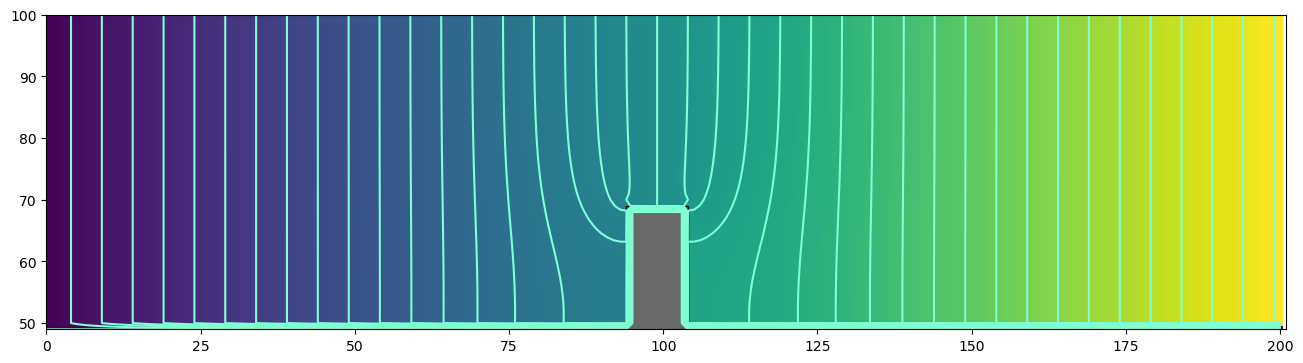

In [56]:
G = np.zeros((y+b, x))
G[b:y+b,:] = M
py1 = 70-1
py2 = 30-1
plt.figure(figsize=(16, 10))
plt.imshow(G, origin='lower')

# Dodawanie prostokąta
rectangle = plt.Rectangle((px1-1, py1), px2-px1, py2 - py1, edgecolor='black', facecolor='dimgray')
plt.gca().add_patch(rectangle)

plt.contour(G, range(0, 201, 5), colors='aquamarine')
plt.xlim(0, x)
plt.yticks(np.arange(min(Y), max(Y), 10))
plt.ylim(b-1, 100)


plt.show()


In [45]:
N = np.zeros((x, y))

for i in range(x):
    for j in range(y):
        if not ((95 <= X[i] <= 105) and (Y[j] <= 70)):
            N[i, j] = u0 * Y[j]

def struga(W, px1, px2, py):
    for i in range(x):
        for j in range(y):
            if Y[j] == 50:
                W[i, 0] = W[0, 1]
            if (X[i] == px1 and Y[j] < py) or (X[i] == px2 and Y[j] < py) or (px1 <= X[i] <= px2 and Y[j] == py):
                W[i, j] = W[0, 0]
    return W

In [46]:
for n in range(300):
    N = struga(N, px1, px2, py)
    for i in range(1, x - 1):
        for j in range(1, y - 1):
            if not (px1 <= X[i] <= px2 and Y[j] <= py):
                N[i, j] = 0.25 * (N[i + 1, j] + N[i - 1, j] + N[i, j + 1] + N[i, j - 1])

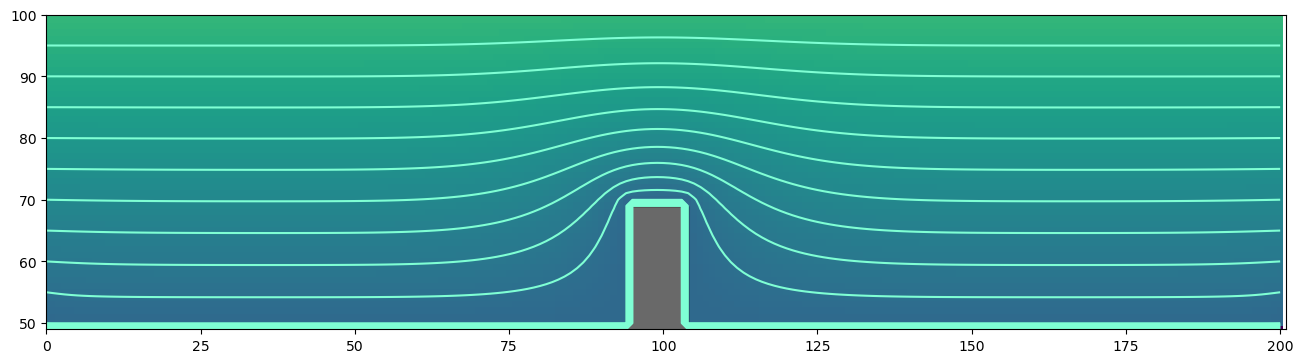

In [55]:
H = np.zeros((x,y+b))
H[:,b:y+b] = N
H[:,50] = H[:,51]
plt.figure(figsize=(16, 10))
plt.imshow(H.T, origin='lower')

# Dodawanie prostokąta
rectangle = plt.Rectangle((px1-1, py1), px2-px1, py2 - py1, edgecolor='black', facecolor='dimgray')
plt.gca().add_patch(rectangle)

plt.contour(H.T, range(0, 201, 5), colors='aquamarine')
plt.xlim(0, x)
plt.yticks(np.arange(min(Y), max(Y), 10))
plt.ylim(b-1, 100)

plt.show()